In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# EDA

In [2]:
data = pd.read_csv('meta/titanic-train.csv')
print(data.shape)
data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
DEPENDENT_VARIABLE = 'Survived'
CATEGORICAL_INDEPENDENT_VARIABLES = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
CONTINUOUS_INDEPENDENT_VARIABLES = ['Age', 'Fare']

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Check Missing***

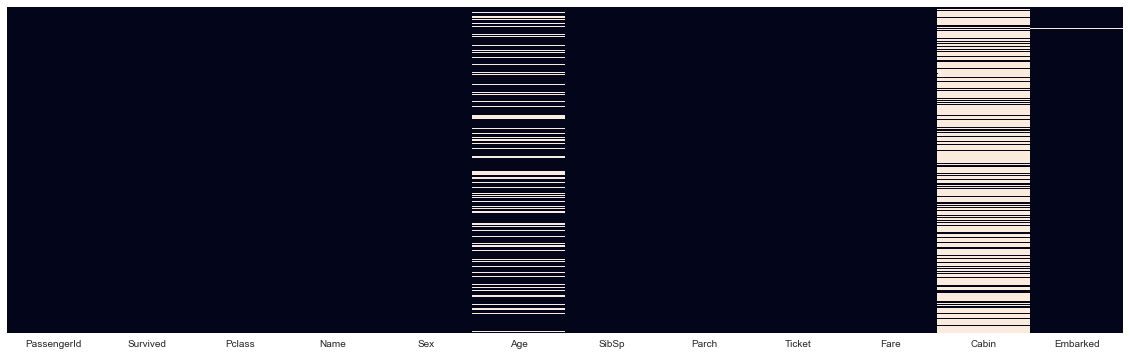

In [5]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False)

**Target Class Distribution**

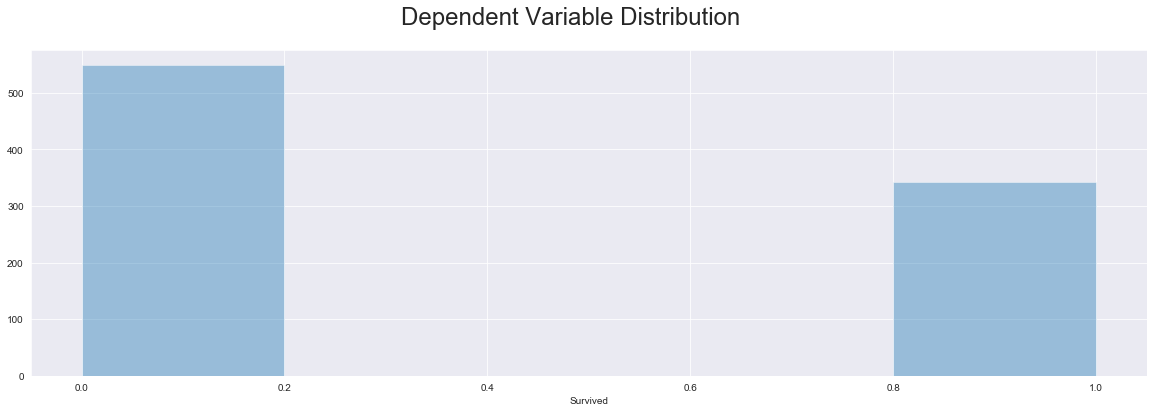

In [6]:
# fig = plt.figure(figsize=(10, 4))
# fig.suptitle('Dependent Variable Distribution', fontsize=24)
# ax = data[DEPENDENT_VARIABLE].value_counts().plot.bar()
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    
fig = plt.figure(figsize=(20, 6))
fig.suptitle('Dependent Variable Distribution', fontsize=24)    
sns.distplot(data[DEPENDENT_VARIABLE], kde=False) 

**Categorical Features**

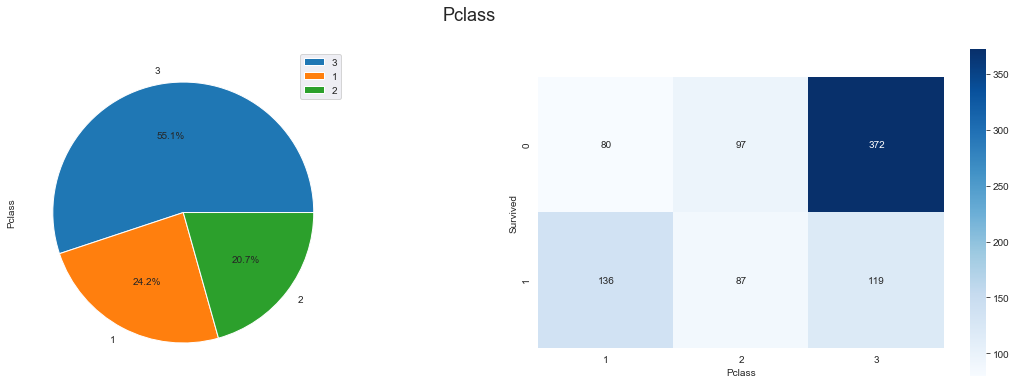

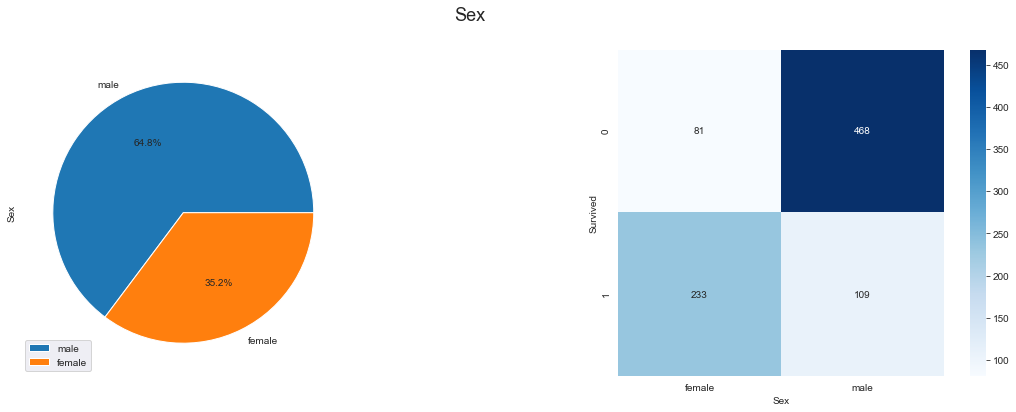

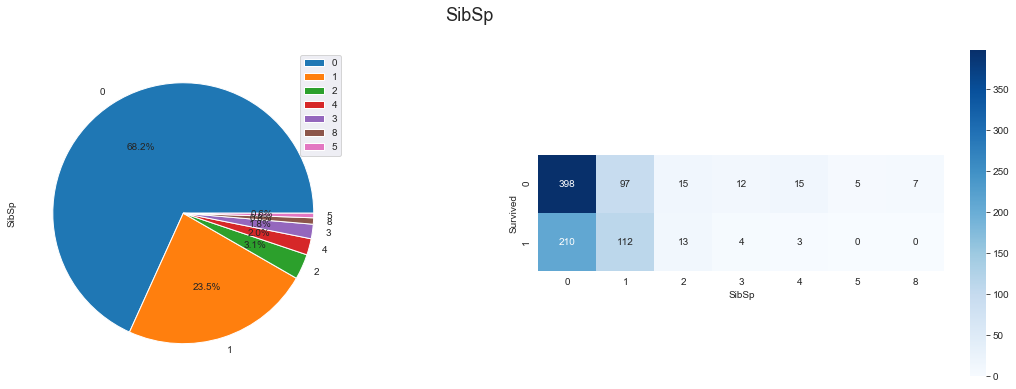

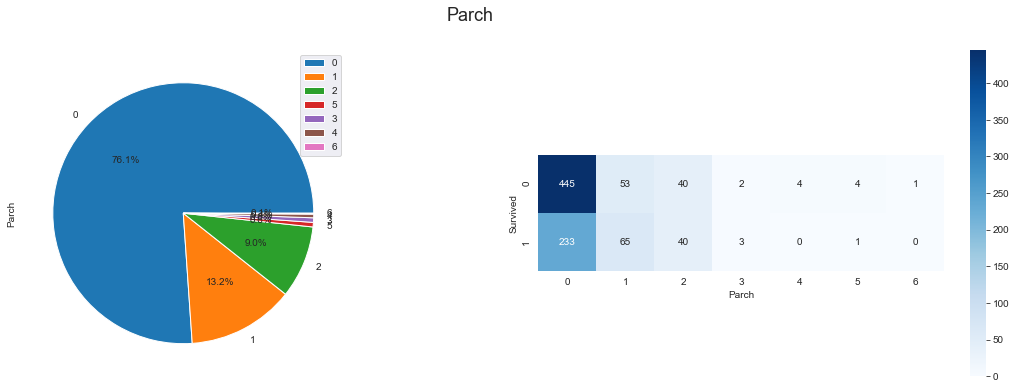

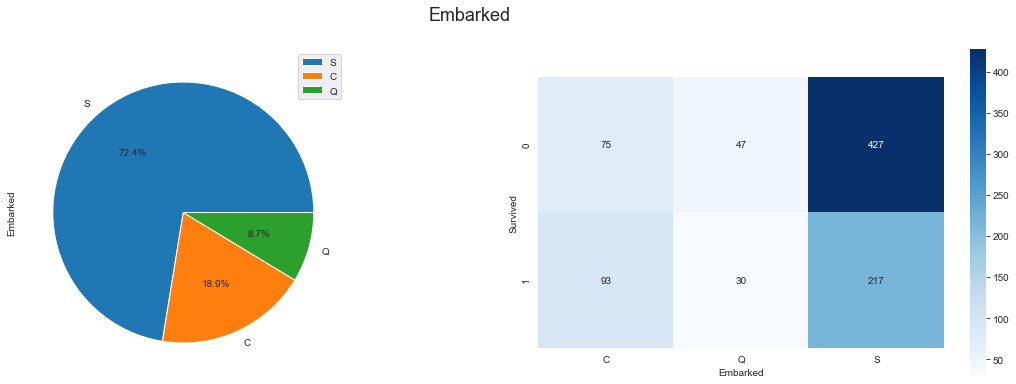

In [7]:
for col in CATEGORICAL_INDEPENDENT_VARIABLES:
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    data[col].value_counts().plot.pie(ax=ax[0], autopct="%1.1f%%")
    ax[0].legend()
    sns.heatmap(pd.crosstab(index=data[DEPENDENT_VARIABLE], columns=data[col]), ax=ax[1], cmap='Blues', annot=True, square=True, fmt='d')
    plt.show()
    
# for col in CATEGORICAL_INDEPENDENT_VARIABLES:
#     fig = plt.figure(figsize=(20, 12))
#     fig.suptitle(col, fontsize=18)
#     ax =[
#         plt.subplot2grid((2, 12), (0,0), colspan=4), plt.subplot2grid((2, 12), (0,4), colspan=8),
#         plt.subplot2grid((2, 12), (1,0), colspan=12)
#     ]
#     data[col].value_counts().plot.pie(ax=ax[0], autopct="%1.1f%%")
#     ax[0].legend()
#     for val in data[col].unique():
#         sns.distplot(data[data[col] == val][DEPENDENT_VARIABLE], ax=ax[1], label=val, kde=False)
#     ax[1].legend()
#     sns.boxplot(data=data, y=DEPENDENT_VARIABLE, x=col, ax=ax[2])
#     plt.show()

**Continuous Features**

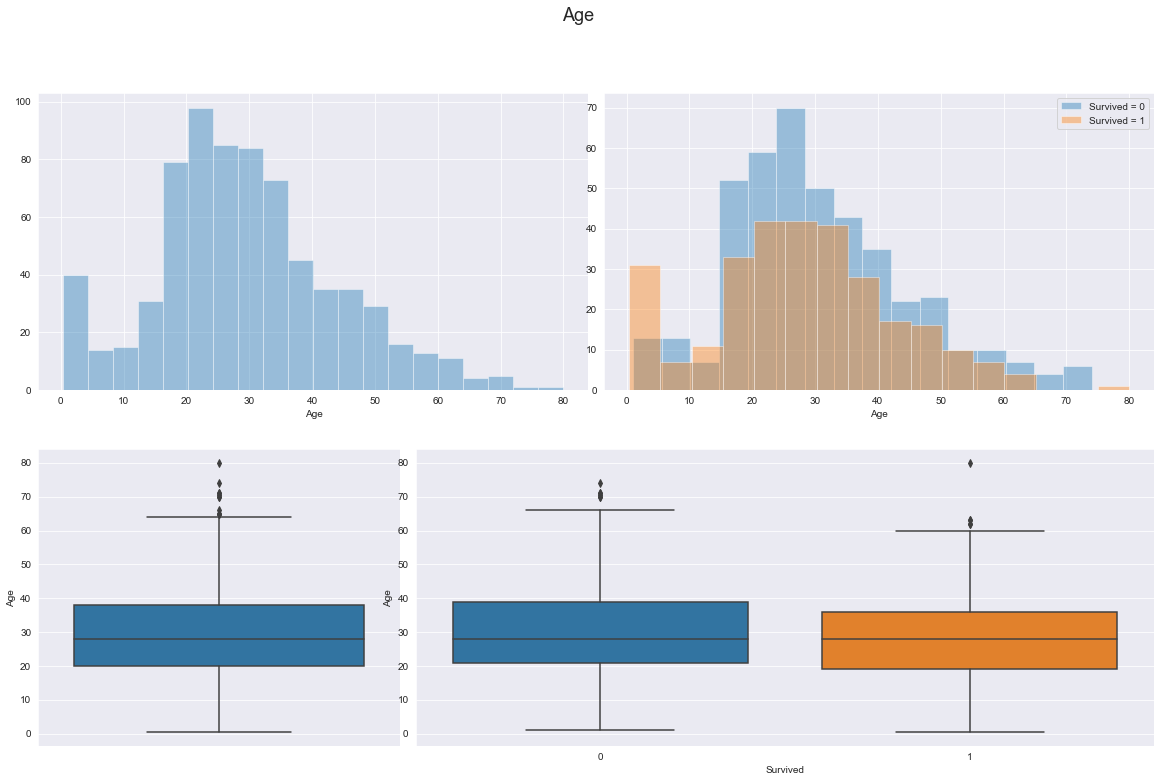

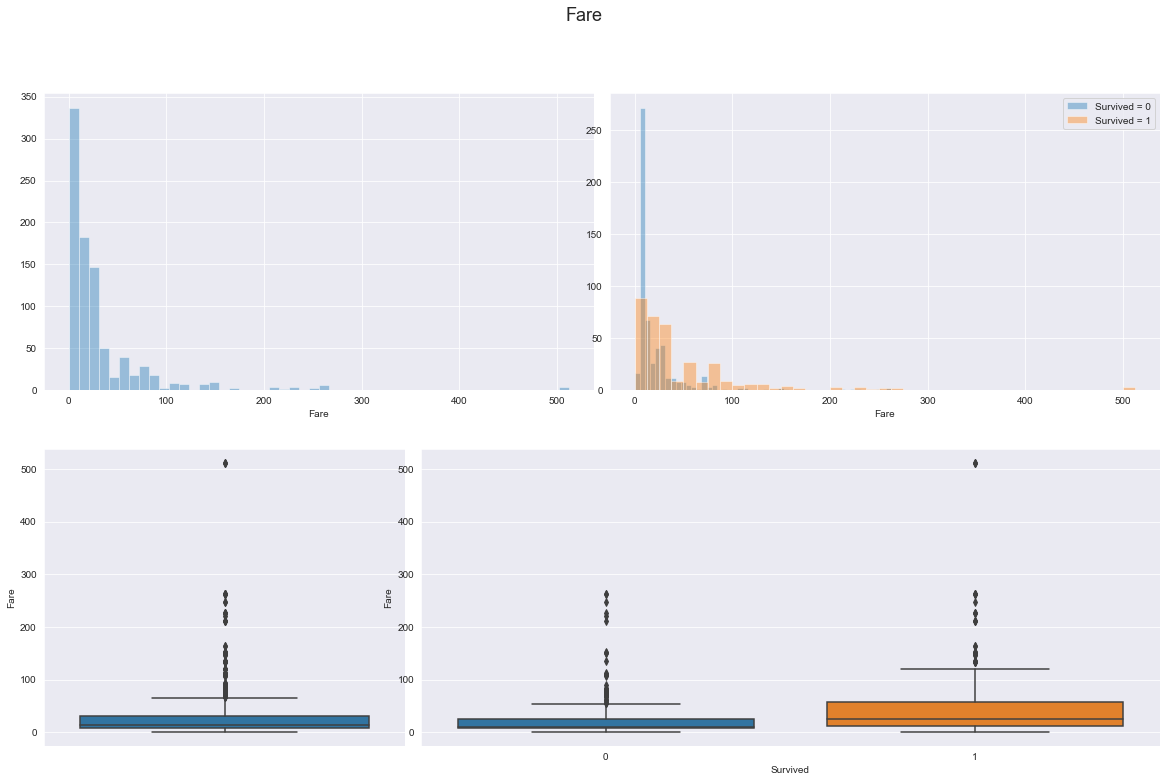

In [8]:
for col in CONTINUOUS_INDEPENDENT_VARIABLES:
    fig = plt.figure(figsize=(20, 12))
    fig.suptitle(col, fontsize=18)
    ax =[
        plt.subplot2grid((2, 12), (0,0), colspan=6), plt.subplot2grid((2, 12), (0,6), colspan=6),
        plt.subplot2grid((2, 12), (1,0), colspan=4), plt.subplot2grid((2, 12), (1,4), colspan=8)
    ]
    sns.distplot(data[col], kde=False, ax=ax[0])
    for i in sorted(data[DEPENDENT_VARIABLE].unique()):
        sns.distplot(data[data[DEPENDENT_VARIABLE] == i][col], kde=False, ax=ax[1], label=f'{DEPENDENT_VARIABLE} = {i}')
    ax[1].legend()
    sns.boxplot(data=data, y=col, ax=ax[2])
    sns.boxplot(data=data, y=col, x=DEPENDENT_VARIABLE, ax=ax[3])
    plt.show()
    
# for col in CONTINUOUS_INDEPENDENT_VARIABLES:
#     fig, ax =plt.subplots(1, 2, figsize=(20, 6))
#     fig.suptitle(col, fontsize=18)
#     sns.distplot(data[col], ax=ax[0], kde=False)
#     data.plot.scatter(x=col, y=DEPENDENT_VARIABLE, ax=ax[1])
#     plt.show()    

# Preprocessing

In [9]:
X = data[CONTINUOUS_INDEPENDENT_VARIABLES+CATEGORICAL_INDEPENDENT_VARIABLES]
y = data[DEPENDENT_VARIABLE]

dtypes = {k: str for k in CATEGORICAL_INDEPENDENT_VARIABLES}
X = X.astype(dtypes)    

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   Pclass    891 non-null    object 
 3   Sex       891 non-null    object 
 4   SibSp     891 non-null    object 
 5   Parch     891 non-null    object 
 6   Embarked  891 non-null    object 
dtypes: float64(2), object(5)
memory usage: 48.9+ KB


In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline

def get_column_names(feature_name, columns):
    val = feature_name.split('_')[1]
    col_idx = int(feature_name.split('_')[0][1:])
    return f'{columns[col_idx]}_{val}'

class Preprocessor():
    
    def __init__(self, return_df=True):
        self.return_df = return_df
        
        self.impute_median = SimpleImputer(strategy='median')
        self.impute_const = SimpleImputer(strategy='constant')
        self.ss = StandardScaler()
        self.ohe = OneHotEncoder(sparse=False, drop='if_binary')
        
        self.num_cols = make_column_selector(dtype_include='number')
        self.cat_cols = make_column_selector(dtype_exclude='number')
        
        self.preprocessor = make_column_transformer(
            (make_pipeline(self.impute_median, self.ss), self.num_cols),
            (make_pipeline(self.impute_const, self.ohe), self.cat_cols),
        )
        
    def fit(self, X):
        return self.preprocessor.fit(X)
        
    def transform(self, X):
        if self.return_df:
            return pd.DataFrame(
                self.preprocessor.transform(X),
                columns=self.num_cols(X)+list(map(
                    lambda x: get_column_names(x, self.cat_cols(X)),
                    self.preprocessor.transformers_[1][1][1].get_feature_names()
                ))
            )
        return X
        
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [11]:
X = Preprocessor().fit_transform(X)
X.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,-0.565736,-0.502445,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.663861,0.786845,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.258337,-0.488854,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.433312,0.420730,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.433312,-0.486337,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
